### IMPORTS

In [48]:
import numpy as np
import matplotlib.pyplot as plt

### ANGLE ESTIMATION

In [54]:
def calculate_angles(pts):
    camera_position_u = 2000-pts[:,0]
    camera_position_v = 1500 - pts[:,1]

    focal_length = 6.7              # mm
    pixel_size = 1/0.8              # pixel/micrometer
    f = .8 * focal_length*1000/pixel_size
    
    azimuth_angle = np.arctan2(camera_position_u,f)
    elevation_angle = np.arctan2(f,np.multiply(camera_position_v,np.cos(azimuth_angle)))
    return np.degrees(azimuth_angle),np.degrees(elevation_angle)

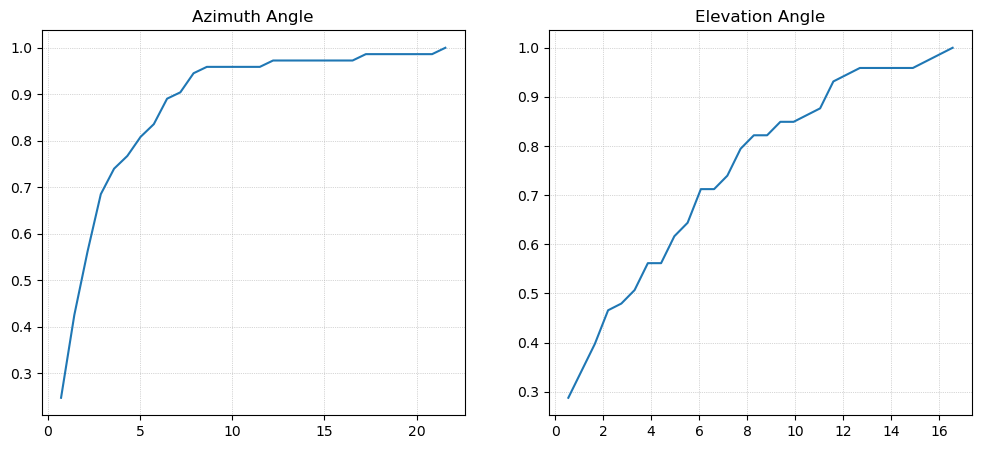

In [71]:
##  SLAVE I 
src_pts = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
src_angles = calculate_angles(src_pts)
src_azimuth,src_elevation = src_angles[0],src_angles[1]

dst_angles = calculate_angles(dst_pts)
dst_azimuth, dst_elevation = dst_angles[0],dst_angles[1]

diff_azimuth = np.abs(src_azimuth - dst_azimuth)
c_azimuth, bins_azimuth = np.histogram(diff_azimuth, bins=30)
pdf_azimuth = c_azimuth / sum(c_azimuth)
cdf_azimuth = np.cumsum(pdf_azimuth)

diff_elevation = np.abs(src_elevation - dst_elevation)
c_elevation, bins_elevation = np.histogram(diff_elevation, bins=30)
pdf_elevation = c_elevation / sum(c_elevation)
cdf_elevation = np.cumsum(pdf_elevation)

fig, ax = plt.subplots(1,2,figsize=(12,5))
# plotting PDF and CDF
ax[0].plot(bins_azimuth[1:], cdf_azimuth)
ax[0].set_title("Azimuth Angle")
ax[0].grid(which = 'major')
ax[0].grid(linestyle=':', linewidth=0.5)


ax[1].plot(bins_elevation[1:], cdf_elevation)
ax[1].set_title("Elevation Angle")
ax[1].grid(which = 'major')
ax[1].grid(linestyle=':', linewidth=0.5)

### PIXEL PERFORMANCE

In [14]:
def euclidian_distance (pt1, pt2):
    return ((pt1[:,0] - pt2[:,0])**2 + (pt1[:,1] - pt2[:,1])**2)**0.5

363.0
Median CASE 1:482.0


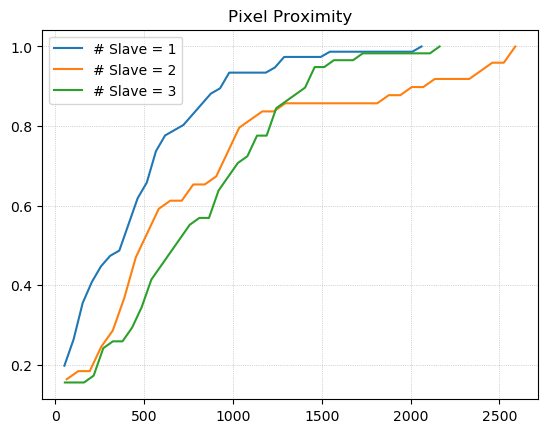

In [76]:
##  SLAVE I 
src_pts_slaveI = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts_slaveI = np.loadtxt('./results/performance/single_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
diff1 = euclidian_distance(src_pts_slaveI, dst_pts_slaveI)
diff1 = diff1.astype(int)
print(np.median(diff1))
count1, bins_count1 = np.histogram(diff1, bins=40)
pdf1 = count1 / sum(count1)
cdf1 = np.cumsum(pdf1)
  
## SLAVE II
src_pts_slaveII = np.loadtxt('./results/performance/two_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts_slaveII = np.loadtxt('./results/performance/two_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
diff2 = euclidian_distance(src_pts_slaveII, dst_pts_slaveII)
diff2 = diff2.astype(int)
print(f"Median CASE 1:{np.median(diff2)}")
count2, bins_count2 = np.histogram(diff2, bins=40)
pdf2 = count2 / sum(count2)
cdf2 = np.cumsum(pdf2)

## SLAVE III
src_pts_slaveIII = np.loadtxt('./results/performance/three_slave.csv', delimiter=',',usecols=[0,1]).astype(int)   
dst_pts_slaveIII = np.loadtxt('./results/performance/three_slave.csv', delimiter=',',usecols=[2,3]).astype(int)  
# Calculate the pixel difference
diff3 = euclidian_distance(src_pts_slaveIII, dst_pts_slaveIII)
diff3 = diff3.astype(int)
count3, bins_count3 = np.histogram(diff3, bins=40)
pdf3 = count3 / sum(count3)
cdf3 = np.cumsum(pdf3)


fig, ax = plt.subplots()
# plotting PDF and CDF
ax.plot(bins_count1[1:], cdf1, label="# Slave = 1")
ax.plot(bins_count2[1:], cdf2, label="# Slave = 2")
ax.plot(bins_count3[1:], cdf3, label="# Slave = 3")
ax.legend()
ax.set_title('Pixel Proximity')
ax.grid(which = 'major')
ax.grid(linestyle=':', linewidth=0.5)
plt.show()

### ***IQ DATA VISUALIZATION***

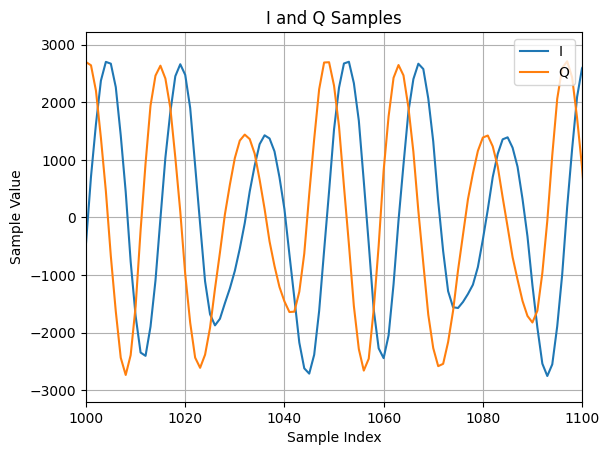

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas dataframe
df = pd.read_csv('./data/IQ_data/main.csv')

# Extract the column containing I values
I_col = df['i']

# Extract the column containing Q values
Q_col = df['q']


# Create a figure and axis object
fig, ax = plt.subplots()
# Plot the I and Q samples on the same plot
ax.plot(I_col, label='I')
ax.plot(Q_col, label='Q')

# Set the axis labels and title
ax.set_xlabel('Sample Index')
ax.set_ylabel('Sample Value')
ax.set_title('I and Q Samples')

# Add a legend to the plot
ax.legend(loc = 'upper right')
ax.set_xlim([1000,1100])
ax.grid()
# Display the plot
plt.show()

(1.0, 100.0)

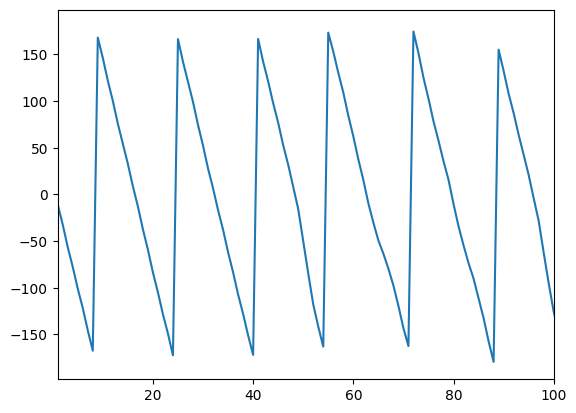

In [2]:
I,Q = np.array(I_col), np.array(Q_col)
phase = np.arctan2(Q_col,I_col)
phase_angle = np.rad2deg(phase)
plt.plot(phase_angle)
plt.xlim([1,100])